# Ourbank Churn Analysis

<img style='float: left' src='blogchurn1.png' alt='blogchurn1' width='500'/>
<!-- ![](blogchurn1.png) -->

In [60]:
# Import relevant librabries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [61]:
#Read the data frame
df=pd.read_csv('Our Bank customer data.csv')
df.shape

(10127, 22)

In [62]:
#Check columns list and missing values
df.isnull().sum()

CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 21                 10127
dtype: int64

In [63]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
Unnamed: 21                     0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [65]:
#Create a function to print out unique column values for 'object' type columns
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column}:{df[column].unique()}')

In [66]:
print_unique_col_values(df)

Attrition_Flag:['Existing Customer' 'Attrited Customer']
Gender:['M' 'F']
Education_Level:['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status:['Married' 'Single' 'Unknown' 'Divorced']
Income_Category:['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category:['Blue' 'Gold' 'Silver' 'Platinum']


In [67]:
# Drop column 'Unnamed: 21' CLIENTNUM'
df.drop(columns=['Unnamed: 21','CLIENTNUM'], inplace=True)

In [68]:
# Replace categoricl values in Gender and Attition_flag columns with numbers
df['Gender'].replace({'M':'1','F':'0'},inplace=True)
df['Attrition_Flag'].replace({'Existing Customer':'1','Attrited Customer':'0'},inplace=True)
df.rename(columns={'Attrition_Flag':'Attrition'},inplace=True)


In [69]:
# Convert string to numeric
df.Gender=pd.to_numeric(df.Gender)
df.Attrition=pd.to_numeric(df.Attrition)

In [70]:
# Check if type is converted to int64
df.dtypes

Attrition                     int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [71]:
df.head()

,Attrition,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<ipython-input-72-d807cfd5464b>:8: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',


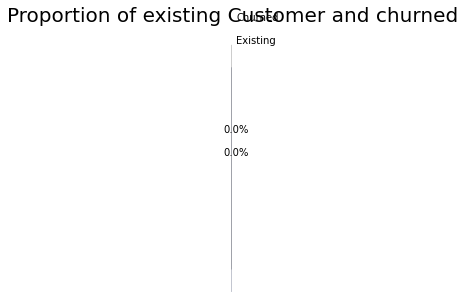

In [72]:
labels = 'Existing','Churned'
sizes = [df.Attrition[df['Attrition']=='1'].count(), 
         df.Attrition[df['Attrition']=='0'].count()]
mycolors=['royalblue','silver']

explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=mycolors)
ax1.axis('equal')
plt.title("Proportion of existing Customer and churned ", size = 20)
plt.show()

In [73]:
df.columns

Index(['Attrition', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

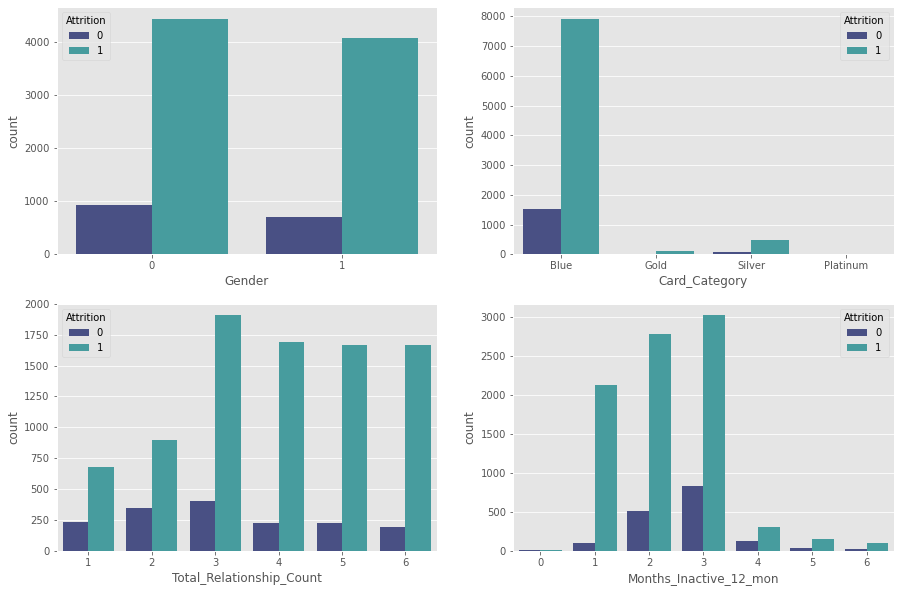

In [74]:
 # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='Gender', hue = 'Attrition',data = df, palette='mako',ax=axarr[0][0])
sns.countplot(x='Card_Category', hue = 'Attrition',data = df,palette='mako', ax=axarr[0][1])
sns.countplot(x='Total_Relationship_Count', hue = 'Attrition',data = df,palette='mako', ax=axarr[1][0])
sns.countplot(x='Months_Inactive_12_mon', hue = 'Attrition',data = df,palette='mako', ax=axarr[1][1]);

# sns.countplot(x='dfomer_Age', hue = 'Attrition',data = df, ax=axarr[0][0])
# sns.countplot(x='Income_Category', hue = 'Attrition',data = df, ax=axarr[1][1])

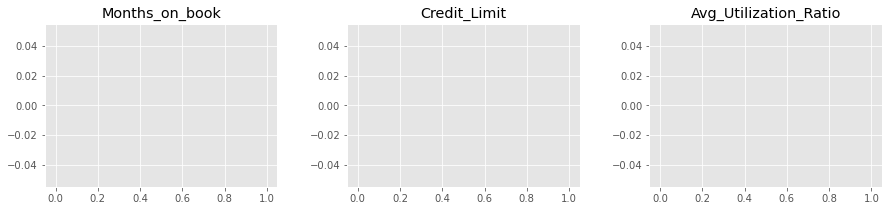

In [75]:
numerical_features=['Months_on_book','Credit_Limit','Avg_Utilization_Ratio']
fig,ax=plt.subplots(1,3,figsize=(15,3))
df[df.Attrition=='1'][numerical_features].hist(bins=20, color='blue',alpha=0.5,ax=ax)
df[df.Attrition=='0'][numerical_features].hist(bins=20, color='orange',alpha=0.5,ax=ax);

# Add labels


In [76]:
df.dtypes

Attrition                     int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [43]:
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=LabelEncoder().fit_transform(df[column])

<ipython-input-43-064f161cfc35>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:


In [44]:
df.dtypes

Attrition                     int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int32
Marital_Status                int32
Income_Category               int32
Card_Category                 int32
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [45]:
df.head()

,Attrition,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,19,1,3,3,1,2,0,26,4,1,3,12691.0,324,11914.0,1.335,217,32,1.625,0.061
1,1,23,0,5,2,2,4,0,31,5,1,2,8256.0,408,7392.0,1.541,338,23,3.714,0.105
2,1,25,1,3,2,1,3,0,23,3,1,0,3418.0,0,3418.0,2.594,893,10,2.333,0.000
3,1,14,0,4,3,3,4,0,21,2,4,1,3313.0,1973,796.0,1.405,236,10,2.333,0.760
4,1,14,1,3,5,1,2,0,8,4,1,0,4716.0,0,4716.0,2.175,65,18,2.500,0.000


In [52]:
#Scale the data
X=df.drop('Attrition',axis=1)
y=df['Attrition']

X=StandardScaler().fit_transform(X)

In [53]:
#Split the data into 80% training, 20% testing

x_train,x_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
#Create the model
model=LogisticRegression()

#Train the model
model.fit(x_train,y_train)

LogisticRegression()

In [55]:
predictions=model.predict(x_test)

In [57]:
print(predictions)

[1 1 1 ... 1 1 1]


In [58]:
#Check
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.56      0.65       327
           1       0.92      0.97      0.94      1699

    accuracy                           0.90      2026
   macro avg       0.84      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026



In [ ]:
cols_to_scale